<a href="https://colab.research.google.com/github/ssvadla/Demonstration/blob/main/Semi_Light_AllData_Upsampling_till3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  train = train.append(i)

In [3]:
train.sort_values("Sentence", inplace = True)


In [4]:
 train = train.drop_duplicates(subset ="Sentence")

In [5]:
train['Target']=train['Target'].replace(['Others'],'Invalid')


In [6]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)

In [8]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# data = train.values


# # split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)

# # summarize distribution
# counter = Counter(y)

# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])


In [10]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=Invalid, n=2253 (16.667%)
Class=Rule/Law/Holding, n=2253 (16.667%)
Class=Facts, n=2253 (16.667%)
Class=Analysis, n=2253 (16.667%)
Class=Conclusion, n=2253 (16.667%)
Class=Issue, n=2253 (16.667%)


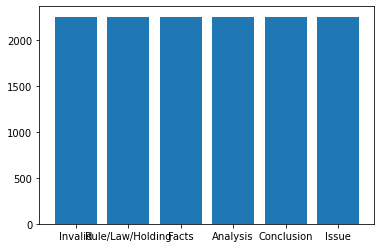

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [12]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

In [13]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn import svm


#X, y = make_classification(random_state=1)
counter = Counter(y)
print(counter)
#X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.26,random_state=42)
X_train, x_val, Y_train, y_val = train_test_split(X,y,test_size=0.26,random_state=42)

classifier = lgb.LGBMClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_val)
#print(np.unique(y_pred))
#print(type(y_pred))

Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation Accuracy_score: %f' % Accuracy_score)
test_pred = classifier.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Accuracy test data', acc_test)
classification_report = classification_report(test_pred,test['Target'],digits=4)
print(classification_report)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)


Counter({'Invalid': 2253, 'Rule/Law/Holding': 2253, 'Facts': 2253, 'Analysis': 2253, 'Conclusion': 2253, 'Issue': 2253})
Validation Accuracy_score: 0.876245
Accuracy test data 0.6333973128598849
                  precision    recall  f1-score   support

        Analysis     0.4026    0.4769    0.4366        65
      Conclusion     0.7692    0.6897    0.7273        29
           Facts     0.7266    0.7698    0.7476       252
         Invalid     0.6145    0.4048    0.4880       126
           Issue     0.4412    0.8333    0.5769        18
Rule/Law/Holding     0.5588    0.6129    0.5846        31

        accuracy                         0.6334       521
       macro avg     0.5855    0.6312    0.5935       521
    weighted avg     0.6416    0.6334    0.6293       521

[[466   7  40  12   7   8]
 [ 12 551   9   1   0   0]
 [ 39   6 467  69  14   8]
 [ 37   8  84 522   9  17]
 [  3   0   5   5 549   1]
 [  6   0  15   8   5 525]]


In [14]:
unlabel = pd.read_csv(r'/content/drive/My Drive/Research/Unlabeled_data.csv')


In [15]:
del unlabel['Complete']
del unlabel['Unnamed: 0']

In [16]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [17]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
unlabel_1 = unlabel.loc[:100000]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100001:200000]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200001:300000]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300001:400000]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400001:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 100001
length of unlabel_2 100000
length of unlabel_3 100000
length of unlabel_4 100000
length of unlabel_5 137702


In [19]:

def index_reset(unlabel_2):
  unlabel_2.reset_index(inplace=True)
  del unlabel_2['index']
  print(unlabel_2.head())
  return unlabel_2

In [20]:
unlabel_1 = index_reset(unlabel_1)
unlabel_2 = index_reset(unlabel_2)
unlabel_3 = index_reset(unlabel_3)
unlabel_4 = index_reset(unlabel_4)
unlabel_5 = index_reset(unlabel_5)

                                                text
0                             motion rehearing filed
1    relator accusation killing husband virgil clark
2  order district judge 39th judicial district re...
3                relator husband married number year
4  evidence indicates family relation always plea...
                                                text
0  responding conclusion regarding evidence annou...
1  conviction transporting intoxicating liquor pu...
2                     bill exception case filed late
3  motion new trial overruled october 22 1927 ord...
4  thereafter december 10th extension order made ...
                                                text
0                       another man carrying clothes
1  officer testified appellant several item cloth...
2  investigation followed report breaking entry a...
3                                  appellant present
4  warrant arrest issued officer went hotel waite...
                                              

In [21]:
Threshold = 0.98

In [22]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [23]:

pred_unlabel_1 = classifier.predict_proba(x_un1)


In [24]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_1:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 5, 2, 2, 2, 2, 1, 1, 5, 1, 4, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 2, 1, 4, 1, 1, 1, 5, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 2, 1, 1, 2, 5, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 5, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 

In [25]:
unlabel_1 = unlabel_1.loc[pos,:]


In [26]:
class_x_un1 = tfidf_vect.transform(unlabel_1['text'])

In [27]:
class_pred_unlabel_1 = classifier.predict(class_x_un1)


In [28]:
unlabel_1['Target']=class_pred_unlabel_1


In [29]:
class_x_un1_new = tfidf_vect.transform(unlabel_1['text'])

In [30]:
X_tfidf = tfidf_vect.transform(unlabel_1['text'])


In [31]:
train = train.rename(columns={'Sentence':'text'})


In [32]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)


In [33]:
train_1.sort_values("text", inplace = True)
train_1 = train_1.drop_duplicates(subset ="text")

[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=678 (12.858%)
Class=5, n=368 (6.979%)
Class=2, n=2811 (53.309%)
Class=0, n=706 (13.389%)
Class=1, n=408 (7.738%)
Class=4, n=302 (5.727%)
total 5273


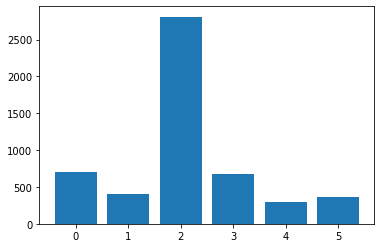

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_1.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
total =0
for k,v in counter.items():
  total = total+v
  per = v / len(y) * 100
  print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
print("total",total)
pyplot.show()

In [35]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_1['text'])


In [36]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=2811 (16.667%)
Class=Rule/Law/Holding, n=2811 (16.667%)
Class=Facts, n=2811 (16.667%)
Class=Analysis, n=2811 (16.667%)
Class=Conclusion, n=2811 (16.667%)
Class=Issue, n=2811 (16.667%)


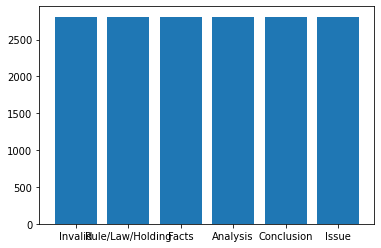

In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_1['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [38]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

In [39]:
from sklearn.metrics import classification_report
#x_train_1 = tfidf_vect.transform(train_1['text'])
#x_train_1.shape
#X_train, x_val, Y_train, y_val = train_test_split(x_train_1,train_1['Target'],test_size=0.25,random_state=2)
X_train, x_val, Y_train, y_val = train_test_split(X,y,test_size=0.26,random_state=42)
classifier_1 = lgb.LGBMClassifier()
classifier_1.fit(X_train, Y_train)
y_pred = classifier_1.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_1.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.905837
Test ------Accuracy score  0.5930902111324377
[[644   9  40  11   6  10]
 [ 11 742   6   2   1   3]
 [ 37   9 592  54   9  10]
 [ 29  12  63 639   8  19]
 [  2   1  11  13 664   1]
 [  6   2  12   7   9 692]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.89      0.88      0.89       729
      Conclusion       0.97      0.96      0.96       775
           Facts       0.83      0.82      0.83       724
         Invalid       0.83      0.88      0.85       726
           Issue       0.96      0.95      0.96       697
Rule/Law/Holding       0.95      0.94      0.95       735

        accuracy                           0.91      4386
       macro avg       0.91      0.91      0.91      4386
    weighted avg       0.91      0.91      0.91      4386

----------test---------------------

In [40]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])


In [41]:

pred_unlabel_2 = classifier_1.predict_proba(x_un2)


In [42]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_2:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 5, 1, 1, 2, 2, 2, 2, 4, 2, 5, 1, 1, 2, 2, 2, 5, 4, 5, 1, 2, 1, 5, 1, 0, 2, 2, 1, 1, 2, 1, 1, 5, 2, 1, 4, 1, 1, 2, 1, 0, 4, 1, 1, 1, 1, 2, 2, 0, 1, 1, 5, 4, 2, 2, 1, 5, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 5, 1, 1, 2, 1, 2, 2, 3, 2, 2, 1, 2, 1, 1, 1, 5, 4, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 4, 1, 1, 2, 5, 2, 2, 2, 3, 1, 1, 5, 1, 2, 5, 2, 4, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 5, 1, 1, 1, 1, 3, 1, 1, 5, 4, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 4, 4, 1, 2, 2, 5, 0, 5, 2, 1, 1, 1, 2, 1, 1, 4, 1, 2, 2, 1, 1, 5, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 5, 2, 5, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 

In [43]:
unlabel_2 = unlabel_2.loc[pos,:]
print(len(unlabel_2))
unlabel_2.head()

2636


,text
0,responding conclusion regarding evidence annou...
25,established without question injured party sus...
39,finding reversible error judgment trial court ...
89,finding reversible error record judgment affirmed
108,finding error record judgment affirmed


In [44]:
class_x_un2 = tfidf_vect.transform(unlabel_2['text'])

In [45]:
class_pred_unlabel_2 = classifier_1.predict(class_x_un2)


In [46]:
unlabel_2['Target']=class_pred_unlabel_2


In [47]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)


In [48]:
train_2.sort_values("text", inplace = True)
train_2 = train_2.drop_duplicates(subset ="text")


In [49]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# data = train_2.values


# # split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)
# print(y)
# # summarize distribution
# counter = Counter(y)
# print(y)
# total =0
# for k,v in counter.items():
#   total = total+v
#   per = v / len(y) * 100
#   print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# pyplot.bar(counter.keys(), counter.values())
# print("total",total)
# pyplot.show()

In [50]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_2['text'])
print(X_tfidf.shape)

(7030, 9649)


In [51]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,02,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,1030,104,1042,1044,105,10511,1056,1065,107,107c,1081,1084,1097,1099,10a,10acre,10th,11,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.120107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=3820 (16.667%)
Class=Rule/Law/Holding, n=3820 (16.667%)
Class=Facts, n=3820 (16.667%)
Class=Analysis, n=3820 (16.667%)
Class=Conclusion, n=3820 (16.667%)
Class=Issue, n=3820 (16.667%)


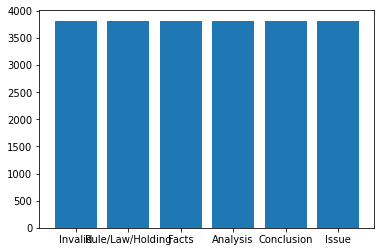

In [52]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_2['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [53]:
t_p = tfidf_vect.transform(test['Sentence'])

In [54]:
from sklearn.metrics import classification_report
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_2,train_2['Target'],test_size=0.25,random_state=2)
classifier_2 = lgb.LGBMClassifier()
classifier_2.fit(X_train, Y_train)
y_pred = classifier_2.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_2.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.765074
Test ------Accuracy score  0.6161228406909789
[[ 78   9  22  10  12  12]
 [  7 160   3   3   1   2]
 [ 79  25 913  78  26  22]
 [ 18   6  25  71   3   7]
 [  2   0   3   2  47   3]
 [ 12   1   6  10   4  76]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.55      0.40      0.46       196
      Conclusion       0.91      0.80      0.85       201
           Facts       0.80      0.94      0.86       972
         Invalid       0.55      0.41      0.47       174
           Issue       0.82      0.51      0.63        93
Rule/Law/Holding       0.70      0.62      0.66       122

        accuracy                           0.77      1758
       macro avg       0.72      0.61      0.65      1758
    weighted avg       0.75      0.77      0.75      1758

----------test---------------------

In [55]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])


In [56]:

pred_unlabel_3 = classifier_2.predict_proba(x_un3)


In [57]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_3:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[2, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 1, 5, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 5, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 5, 2, 5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 4, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 4, 5, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 5, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 2, 0, 5, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 5, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 1, 2, 1, 2, 2, 5, 

In [58]:
unlabel_3 = unlabel_3.loc[pos,:]
print(len(unlabel_3))
unlabel_3.head()

6721


,text
10,crossexamination captain johnson testified wen...
12,trial court properly overruled appellant reque...
51,error pointed judgment reversed cause remanded
60,reason indicated judgment reversed cause remanded
100,judgment trial court affirmed


In [59]:
class_x_un3 = tfidf_vect.transform(unlabel_3['text'])

In [60]:
class_pred_unlabel_3 = classifier_2.predict(class_x_un3)


In [61]:
unlabel_3['Target']=class_pred_unlabel_3


In [62]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)


In [63]:
train_3.sort_values("text", inplace = True)
train_3 = train_3.drop_duplicates(subset ="text")



In [64]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# data = train_3.values


# # split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)
# print(y)
# # summarize distribution
# counter = Counter(y)
# print(y)
# total =0
# for k,v in counter.items():
#   total = total+v
#   per = v / len(y) * 100
#   print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# pyplot.bar(counter.keys(), counter.values())
# print("total",total)
# pyplot.show()

In [65]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_3['text'])
print(X_tfidf.shape)

(12584, 13177)


In [66]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,00100,015,02,1,10,100,1000,10000,100000,1000000,10000000,10000â,1000x22,1005,1006,1008,1008a,100x22,101,1010,1013,1015,102,1020,1026,1030,104,1042,1044,104545,105,1050,10511,1056,1065,107,107c,1081,1084,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.133841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=8040 (16.667%)
Class=Rule/Law/Holding, n=8040 (16.667%)
Class=Facts, n=8040 (16.667%)
Class=Analysis, n=8040 (16.667%)
Class=Issue, n=8040 (16.667%)
Class=Conclusion, n=8040 (16.667%)


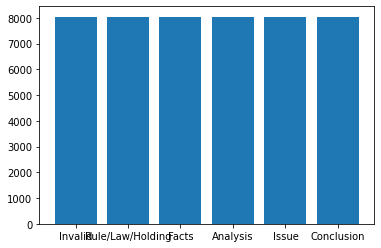

In [67]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train_3['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [68]:
t_p = tfidf_vect.transform(test['Sentence'])

In [69]:
from sklearn.metrics import classification_report
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_3,train_3['Target'],test_size=0.25,random_state=2)
classifier_3 = lgb.LGBMClassifier()
classifier_3.fit(X_train, Y_train)
y_pred = classifier_3.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))

Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_3.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.855054
Test ------Accuracy score  0.6103646833013435
[[  65    7   35   14   13   14]
 [   4  329    4    1    0    0]
 [  80   23 1914   94   38   28]
 [  19    4   21  122    1   11]
 [   5    0    3    2  126    7]
 [  10    1    7    6    4  134]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.44      0.36      0.39       183
      Conclusion       0.97      0.90      0.94       364
           Facts       0.88      0.96      0.92      1984
         Invalid       0.69      0.51      0.59       239
           Issue       0.88      0.69      0.78       182
Rule/Law/Holding       0.83      0.69      0.75       194

        accuracy                           0.86      3146
       macro avg       0.78      0.69      0.73      3146
    weighted avg       0.85      0.86      0.85      3146


In [70]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])


In [71]:

pred_unlabel_4 = classifier_3.predict_proba(x_un4)


In [72]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_4:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[4, 4, 2, 2, 1, 5, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 4, 2, 1, 2, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 1, 3, 4, 3, 5, 1, 1, 2, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 4, 1, 3, 3, 2, 2, 1, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 4, 3, 3, 2, 2, 2, 2, 1, 3, 4, 3, 3, 1, 4, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 1, 3, 3, 5, 3, 2, 1, 1, 4, 2, 2, 1, 3, 3, 1, 3, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 1, 5, 1, 2, 2, 4, 1, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 4, 1, 2, 2, 5, 2, 1, 2, 2, 2, 2, 

In [73]:
unlabel_4 = unlabel_4.loc[pos,:]
print(len(unlabel_4))
unlabel_4.head()

11986


,text
14,appellant insists considered complaint refusal...
17,appellant insists setting refusal special char...
27,got top put private part private part got left
28,next time got floor put private part private p...
52,evidence insufficient judgment reversed cause ...


In [74]:
class_x_un4 = tfidf_vect.transform(unlabel_4['text'])

In [75]:
class_pred_unlabel_4 = classifier_3.predict(class_x_un4)


In [76]:
unlabel_4['Target']=class_pred_unlabel_4
unlabel_4.head()

,text,Target
14,appellant insists considered complaint refusal...,Issue
17,appellant insists setting refusal special char...,Issue
27,got top put private part private part got left,Facts
28,next time got floor put private part private p...,Facts
52,evidence insufficient judgment reversed cause ...,Conclusion


In [77]:
train_3.head()

,Unnamed: 0,text,Target
1364,239.0,"""(I)n the First Amendment area 'government may...",Invalid
1833,185.0,"""... that nowhere in the statute was it stated...",Invalid
2431,415.0,"""Although a statute may be neither vague, over...",Rule/Law/Holding
2245,416.0,"""For even when pursuing a legitimate interest,...",Rule/Law/Holding
1561,25.0,"""If an indictment has been found or accusation...",Facts


In [78]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)


In [79]:
train_4.sort_values("text", inplace = True)
train_4 = train_4.drop_duplicates(subset ="text")



In [80]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# data = train_4.values


# # split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)
# print(y)
# # summarize distribution
# counter = Counter(y)
# print(y)
# total =0
# for k,v in counter.items():
#   total = total+v
#   per = v / len(y) * 100
#   print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# pyplot.bar(counter.keys(), counter.values())
# print("total",total)
# pyplot.show()

In [81]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_4['text'])


In [82]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()


In [83]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state=42,k_neighbors=5)
# X, y = oversample.fit_resample(X_tfidf_df, train_4['Target'])
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [84]:
t_p = tfidf_vect.transform(test['Sentence'])

In [85]:
from sklearn.metrics import classification_report
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_4,train_4['Target'],test_size=0.25,random_state=2)
classifier_4 = lgb.LGBMClassifier()
classifier_4.fit(X_train, Y_train)
y_pred = classifier_4.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_4.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.929272
Test ------Accuracy score  0.6084452975047985
[[ 101    9   29   10   10   10]
 [   4  506    5    1    1    1]
 [  86   10 3908   97   30   24]
 [  14    0   14  439    4    8]
 [   2    1    4    1  255    2]
 [   9    3    7    9    6  191]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.60      0.47      0.52       216
      Conclusion       0.98      0.96      0.97       529
           Facts       0.94      0.99      0.96      3967
         Invalid       0.92      0.79      0.85       557
           Issue       0.96      0.83      0.89       306
Rule/Law/Holding       0.85      0.81      0.83       236

        accuracy                           0.93      5811
       macro avg       0.87      0.81      0.84      5811
    weighted avg       0.93      0.93      0.93      5811


In [86]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])


In [87]:
pred_unlabel_5 = classifier_4.predict_proba(x_un5)


In [88]:
import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_5:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

[2, 5, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 4, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 4, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 2, 1, 1, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 5, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 2, 2, 2, 3, 5, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [89]:
unlabel_5 = unlabel_5.loc[pos,:]
print(len(unlabel_5))
unlabel_5.head()

24255


,text
10,trial judge told jury part law case found beli...
13,offense possession intoxicating liquor punishm...
27,finding error record judgment thing affirmed
30,fully aware rule announced case dubose v
31,app 230 followed many case since time late cas...


In [90]:
class_x_un5 = tfidf_vect.transform(unlabel_5['text'])

In [91]:
class_pred_unlabel_5 = classifier_4.predict(class_x_un5)


In [92]:
unlabel_5['Target']=class_pred_unlabel_5
unlabel_5.head()

,text,Target
10,trial judge told jury part law case found beli...,Facts
13,offense possession intoxicating liquor punishm...,Rule/Law/Holding
27,finding error record judgment thing affirmed,Conclusion
30,fully aware rule announced case dubose v,Invalid
31,app 230 followed many case since time late cas...,Invalid


In [93]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)


In [94]:
train_5.sort_values("text", inplace = True)
train_5 = train_5.drop_duplicates(subset ="text")
print(len(train_5))

45387


In [95]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder
# data = train_5.values


# # split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)
# print(y)
# # summarize distribution
# counter = Counter(y)
# print(y)
# total =0
# for k,v in counter.items():
#   total = total+v
#   per = v / len(y) * 100
#   print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# pyplot.bar(counter.keys(), counter.values())
# print("total",total)
# pyplot.show()

In [96]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_5['text'])
print(X_tfidf.shape)

(45387, 24663)


In [97]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,0,00,00100,011,012,013,015,01819081,01819083,01819084,02,0259,04,1,10,100,1000,10000,100000,1000000,10000000,10000â,1000x22,1005,1006,1007,1008,1008a,100x22,101,1010,1013,1015,1018,102,1020,1026,1028,103,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.16688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state=42,k_neighbors=5)
# X, y = oversample.fit_resample(X_tfidf_df, train_5['Target'])
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [99]:
t_p = tfidf_vect.transform(test['Sentence'])

In [100]:
from sklearn.metrics import classification_report
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape
X_train, x_val, Y_train, y_val = train_test_split(x_train_5,train_5['Target'],test_size=0.25,random_state=2)
classifier_5 = lgb.LGBMClassifier()
classifier_5.fit(X_train, Y_train)
y_pred = classifier_5.predict(x_val)
print(np.unique(y_pred))
print(type(y_pred))


Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation ------- Accuracy_score: %f' % Accuracy_score)

test_pred = classifier_5.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Test ------Accuracy score ', acc_test)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)
print("---------validation--------------")
print(classification_report(y_val,y_pred))
print("----------test---------------------")
print(classification_report(test['Target'],test_pred))

['Analysis' 'Conclusion' 'Facts' 'Invalid' 'Issue' 'Rule/Law/Holding']
<class 'numpy.ndarray'>
Validation ------- Accuracy_score: 0.965806
Test ------Accuracy score  0.6199616122840691
[[ 119    5   36    7    9   14]
 [   2  733    1    1    0    2]
 [  77   20 8313   73   35   20]
 [  12    4   19 1071    2   13]
 [   1    0    5    3  442    2]
 [   4    1    7    8    5  281]]
---------validation--------------
                  precision    recall  f1-score   support

        Analysis       0.63      0.55      0.59       215
      Conclusion       0.99      0.96      0.98       763
           Facts       0.97      0.99      0.98      8381
         Invalid       0.96      0.92      0.94      1163
           Issue       0.98      0.90      0.93       493
Rule/Law/Holding       0.92      0.85      0.88       332

        accuracy                           0.97     11347
       macro avg       0.91      0.86      0.88     11347
    weighted avg       0.96      0.97      0.97     11347
